# Exploratory Data Analysis (EDA) [^intro]

[^intro]: This Jupyter Notebook is based on Chapter 1 of {cite}`Bruce2017`, Chapter 1 of {cite}`Diez2010`, and Chapter 3 of {cite}`VanderPlas2019`.

_(c) 2021, Lina Ochoa Venegas, Eindhoven University of Technology_

Probability theory saw its origins in gambling by the end of the 16$^{th}$ century. However, it was truly developed between the 17$^{th}$ and the 19$^{th}$ centuries. Mathematicians and gamblers used games of chance–such as the ones involving dice–to understand the extent to which a situation could happen. This is what we formally know as probability. In short, **probability** is the likelihood that an event will happen in the future or is true. This mathematical theory sets the foundations of **statistics** which is an applied science concerned with the modeling and analysis of data.

```{admonition} Probability and statistics
:class: alert
Probability is the likelihood that an event will happen in the future or is true. Wheres, statistics is an applied science concerned with the modeling and analysis of data
```

### Data Science
Statistics is fundamental for data science; its use is orthogonal to any data science problem. But what is data science in the end? **Data science** is an interdisciplinary field that combines *statistics*, *computer science*, and *domain knowledge* methods to extract knowledge from data to solve problems in a given domain. In this sense, 

* *statistics* are used to model and analyze datasets; 
* *computer science* is used to design algorithms that help to process, store, and apply statistical methods to the data at hand, and;
* *domain knowledge* is used to define a clear problem and provide a concrete answer to it.

```{admonition} Data science
:class: alert
Data science is an interdisciplinary field that combines statistics, computer science, and domain knowledge methods to extract knowledge from data to solve problems in a given domain.
```

### Exploratory Data Analysis
In this notebook, we will introduce the notion of **Exploratory Data Analysis (EDA)**, an area of statistics that focuses on getting acquainted with the data at hand. It was promoted by John Tukey in his book "Exploratory Data Analysis" (1977), who mentioned the importance of first exploring the data to formulate better hypotheses later and assess previous assumptions. With the current computational power, EDA has gone far beyond expected, providing tools and resources to a variety of disciplines. With this mindset change, a data science project considers at least the following two phases:

1. **Exploratory data analysis:** assumptions are verified, methods are chosen, and quality hypotheses are formulated.
2. **Confirmatory data analysis:** (also known as statistical hypothesis testing) previously defined hypotheses are tested and conclusions are drawn from the analysis.

**Fun fact:** John Tukey also coined the term "bit" in 1947, when developing statistical methods for computers when he was working for Bell Labs.

Hereafter, we introduce some of the main concepts to undertake the EDA part of a project. Some of these concepts will also be later used during statistical hypothesis testing.


```{image} assets/john-tukey.jpeg
:alt: John Tukey
:width: 400px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">John Tukey (1915–2000), one of the main contributors of statistics. Find the source <a href="https://www.amphilsoc.org/item-detail/photograph-john-wilder-tukey" target="_blank">here</a>.</span>
</div>

```{admonition} Exploratory Data Analyses (EDA)
:class: alert
Area of statistics that focuses on getting acquainted with the data to assess assumptions, choose methods, and define hypotheses.
```

## Structured Data <a class="anchor" id="structured"></a>

Data comes from diverse sources such as text, sensors, and images. In the initial stage, this data is unstructured and hard to process; extracting facts out from ambiguous representations is cumbersome. That is why we need to structure our data. Ultimately, we want to have an input to which we can apply the statistical concepts we are learning. And for what? For getting actionable information, for having enough evidence to help us make decisions in a better way! You cannot change the past but you can definitely learn from it to change the future.

### Data Types
Structured data usually comes in two flavors:
* **Numeric:** as its name suggests, we use numbers to represent the data. We consider two special cases:
    - **Discrete:** numerical data taking an integer value (e.g. counts). When thinking in Python terms, we consider `int` or `long` values.
    - **Continuous:** data taking any numerical value in an interval (e.g. ratios). When thinking in Python terms, we consider `float` values.
* **Categorical:** data that only takes a fixed set of values or states. Such values are called **levels**.
    - **Nominal:** categorical data with any order among its levels (e.g. "Yellow", "Blue", "Red").
    - **Binary:** a special case of nominal data with just two levels: true (1) or false (0).
    - **Ordinal:** categorical data with a natural order (e.g. "Excellent", "Good", "Bad")
    
| Data type   | Category    | Python types  |
|-------------|-------------|---------------|
| Discrete    | Numeric     | `int`, `long` |
| Continuous  | Numeric     | `float`       |
| Nominal     | Categorical | `str`, `int`  |
| Binary      | Categorical | `bool`        |
| Ordinal     | Categorical | `str`, `int`  |

Knowing the data type of the variables we are dealing with is important because it will allow us to define the methods to visualize them and analyze the data. Actually, Python improves its computations based on the selected data type.

```{admonition} Data type
:class: alert
A classification that defines the type of value that must be assigned to a variable and the possible operations that apply to it. In data science, we consider numeric and categorical types. Numeric values can either be continuous or discrete. Categorial values can be nominal or ordinal. Binary values are a special case of nominal values.
```

## Rectangular Data <a class="anchor" id="rectangular"></a>

In data science, we usually work with a special type of data: rectangular data. Think of it as a spreadsheet. **Rectangular data** is a two-dimensional matrix where columns represent features (a.k.a. **variables**) and rows represent records (a.k.a. **cases**). This data representation is derived from **unstructured data** coming from diverse sources. In Python, we use `pandas`, a special library that helps us representing this type of data. In `pandas` we use the `DataFrame` type: `DataFrame` is a type just as `int`, `str`, or `bool`, the only difference is that it supports other types of operations and is more complex than the types we have just mentioned. Actually, a data frame often contains heterogeneous (data with different data types) and missing data (unknown values for certain features in a record).

### Import `pandas`
To start interacting with the `DataFrame` type you will first need to install `numpy` and `pandas` in your virtual environment. Afterward, you will be able to import it as follows:

In [1]:
import pandas as pd

The `as pd` part of the statement just gives an alternative name to the library (a.k.a. **alias**), so we do not have to write the entire name every time we want to access one of its capabilities.

### The Wines `DataFrame`

There are several ways of creating a `DataFrame` with `pandas`. However, for now, we only care about the notion of what a `DataFrame` is and how it looks. Later in the course, we will learn to create instances of this type, so do not panic! For this notebook, we will be using a modified version of the **Wine Reviews** dataset created by Zack Thoutt under a 
Creative Commons BY-NC-SA 4.0 license, and later updated by David Stroud. You can find the original dataset [here](https://github.com/davestroud/Wine). Zack gathered all data from the [Wine Enthusiast website](https://www.winemag.com/), an influential magazine about wine and drinks that posts wine ratings and other relevant wine-related reports. The ratings are presented by professional sommeliers (wine tasters) that perform a sensory evaluation of the wine (wine tasting). In the dataset, you will find the following variables (columns):

| Variable   | Data Type | Category    | Description |
|------------|-----------|-------------|-------------|
| `title`    | Text*      | -           | Complete name or title of the rated wine |
| `country`  | Nominal   | Categorical | Name of the country where the wine is being produced |
| `province` | Nominal   | Categorical | The province or state where the wine is from |
| `winery`   | Nominal   | Categorical | Name of the company producing the wine |
| `designation` | Nominal | Categorical | The name of the wine given to the wine by the winery |
| `variety`  | Nominal   | Categorical | Type of wine based on its grape, region, and the winemaker’s art |
| `points`   | Discrete  | Numeric     | Points given by a sommelier to the wine after tasting |
| `price`    | Discrete  | Numeric     | Price of a bottle of the wine |
| `description` | Text*   | -           | Description of the tasted wine given by the sommelier |

<sup>* Informative columns. They are not relevant for the data analysis, that is why no categorical or numeric data type has been defined.<sup>

In the next cell, we will show you one way of creating a `DataFrame`. In this case, we use *dictionaries* and *lists* as a baseline. (You will learn more about these types next week!) This dataset will contain just a few values taken from the abovementioned dataset, so we can easily understand the main concepts presented in this notebook. Later on, we will load the whole data. In addition, we won't include the `description` variable for the sake of simplicity. From now on, we will refer to this data frame as the `wines` data frame. Now, how does the data frame look like? 

```{image} assets/wine-tasting.jpeg
:alt: Wine tasting
:width: 400px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Wine tasting setting.</span>
</div>

In [2]:
# Import pandas
import pandas as pd

# Gather your data
data = {
    'title': [
        'Earthquake 2011 Zinfandel', 
        'Ruinart NV Blanc de Blancs Brut Chardonnay', 
        'Undurraga 2012 U Estate Grown Cabernet Sauvignon', 
        'Grassini 2014 Merlot'],
    'country': ['US', 'France', 'Chile', 'US'],
    'province': ['California', 'Champagne', 'Rapel Valley', 'California'],
    'winery': ['Earthquake', 'Ruinart', 'Undurraga', 'Grassini'],
    'designation': [ 'NaN', 'Blanc de Blancs Brut', 'U Estate Grown', 'NaN'],
    'variety': ['Bordeaux-style Red Blend', 'Chardonnay', 'Touriga Nacional', 'Chardonnay'],
    'points': [84, 93, 86, 95],
    'price': [26.0, 65.0, 11.0, 95.0]
}

# Create data frame
wines = pd.DataFrame(data)

# See data frame content
wines

,title,country,province,winery,designation,variety,points,price
0,Earthquake 2011 Zinfandel,US,California,Earthquake,NaN,Bordeaux-style Red Blend,84,26.0
1,Ruinart NV Blanc de Blancs Brut Chardonnay,France,Champagne,Ruinart,Blanc de Blancs Brut,Chardonnay,93,65.0
2,Undurraga 2012 U Estate Grown Cabernet Sauvignon,Chile,Rapel Valley,Undurraga,U Estate Grown,Touriga Nacional,86,11.0
3,Grassini 2014 Merlot,US,California,Grassini,NaN,Chardonnay,95,95.0


### Indexes

If you look carefully at the previous example, you will notice that a new column was created. (The first column of the matrix before the ones we have explicitly defined.) This column is an integer index that is automatically created every time you create a new data frame and you do not explicitly mention any other type of index. An **index** is a data structure used to improve the efficiency of certain types of operations and queries executed atop the data frame. They are very useful especially when accessing specific records within your data. To access them you can use the `loc` indexer and specify the number of the record you want within the square brackets.

In [3]:
# Get Grassini 2014 Merlot case
wines.loc[2]

title          Undurraga 2012 U Estate Grown Cabernet Sauvignon
country                                                   Chile
province                                           Rapel Valley
winery                                                Undurraga
designation                                      U Estate Grown
variety                                        Touriga Nacional
points                                                       86
price                                                      11.0
Name: 2, dtype: object

```{admonition} Rectangular data
:class: alert
Rectangular data is a two-dimensional matrix where columns represent features (a.k.a. variables) and rows represent records (a.k.a. cases). It often contains heterogeneous data.
```

## Location Measures <a class="anchor" id="location"></a>

Numeric variables usually vary within a wide interval of values. When exploring your data, you would like to get an *estimate* of where most of your data is located for each variable. This estimate is known as the **central tendency** of the data, and it shows the typical or central values of your variables. An **estimate** or a **measure** is a value calculated out from a set of records within your data. They are called like this because they are computed based on what you can observe, which is not necessarily the true reality; uncertainty always lies behind it. There are different measures of location, in this notebook, we will talk about three of them:

* the mean,
* the median, and
* the mode.

```{admonition} Location measure
:class: alert
Estimate of central tendency that states where most of the data is located for a given variable.
```

### Mean

The **mean** is one of the most basic measures of location and it is also known as *average*. It is represented as $\overline{x}$ in mathematical notation. To compute it, you must add all values of a given variable, and then divide it by the number of values.

$mean = \overline{x} = \frac{\sum_{i}^{n} x_i}{n}$

In the formula above $n$ stands for the total number of values and $x_i$ for the $i^{th}$ value in your data, where $i$ ranges from $1$ until $n$ (i.e. $x \in [i, n]$).

For instance, if we consider the data from the `wines` data frame, we can compute the mean of the `points` variable as follows.

We have 4 records, then: $n = 4$  
Now, we can compute the mean: $\overline{x} = \frac{\sum_{i}^{4} x_i}{4} = \frac{84 + 93 + 86 + 95}{4} = \frac{358}{4} = 89.5$

However, computing the mean by hand when dealing with a big dataset is not handy anymore. That is why Python offers a ser of libraries that can help you with these common calculations. Two examples are the `statistics` and `pandas` libraries. Let us see how they work.

In [4]:
# Using pure python
points = wines['points']
mean = sum(points) / len(points)
mean

89.5

In [5]:
# Using the statistics library
import statistics as st

points = wines['points']
mean = st.mean(points)
mean

89.5

In [6]:
# Using pandas
mean = wines['points'].mean() 
mean

89.5

There are some variations to the mean. For instance, you can also compute the *trimmed mean* when having outliers (extreme values that alter your results); or the *weighted mean* when you want to give more or less importance to a set of values within your data. This one is especially useful when one of your data sources is not that accurate.

```{admonition} Mean
:class: alert
The mean is an estimate of central tendency that computes the average of all values of a given variable.
```

### Median

The **median** is the middle number of a sorted list of values of a given variable. It is represented as $\widetilde{x}$ in mathematical notation, and it is computed as follows.

$median = \widetilde{x} = x_{(n \, +\, 1) \, / \, 2}$

If the number of values is even, it is computed as the mean between the two middle values of the list as follows. 

$median = \widetilde{x} = \frac{x_{n/2} + x_{n/2 \, + \, 1}}{2}$

For example, if we consider the data from the `wines` data frame, we can compute the median of the `points` variable as follows.

1. Order all values: 84, 86, 93, 95
2. Define $n$: $n = 4$
3. Identify if $n$ is even or odd: $n \, \% \, 4 = 0$, thus, $n$ is even
4. Compute the median: 
    * $x_{n/2} = x_{4/2} = x_{2} = 86$ 
    * $x_{n/2 + 1} = x_{4/2 \, + \, 1} = x_{3} = 93$
    * $\widetilde{x} = \frac{x_{n/2} + x_{n/2 \, + \, 1}}{2} = \frac{86 + 93}{2} = \frac{179}{2} = 89.5$ 
    
Python and the `statistics` and `pandas` libraries can also help us to compute the median. Let us see how they work.!

In [7]:
# Using pure python
points = wines['points']
n = len(points)
points_sorted = sorted(points)
median: float
    
if n % 2 == 0:
    index_1 = int(n / 2) - 1      # Indeces in Python start from 0, we need to substract 1
    index_2 = int(n / 2 + 1) - 1  # Same case here
    median = (points_sorted[index_1] + points_sorted[index_2]) / 2
else:
    index = int((n + 1) / 2) - 1  # And here.
    median = points_sorted[index]

median

89.5

In [8]:
# Using the statistics library
import statistics as st

points = wines['points']
median = st.median(points)
median

89.5

In [9]:
# Using pandas
median = wines['points'].median() 
median

89.5

As you have seen, instead of considering all the observations–as the mean does–the median only considers the central values of the variable. That is why the median is considered a more *robust* measure than the mean; the mean is very sensitive to extreme cases. A **robust** measure is such that its value is not highly impacted by outliers. An **outlier** is a value that is very distant from other values within your data. This does not mean that outliers should be considered as erroneous data, but they are worthy of further analysis.

To understand the idea of robustness, let us add the infamous "Disgusting Wine 2021 Malbec" record to the `wines` data frame. This case is not part of the real data set.

In [10]:
# Import pandas
import pandas as pd

# Gather your data
data = {
    'title': [
        'Earthquake 2011 Zinfandel', 
        'Ruinart NV Blanc de Blancs Brut Chardonnay', 
        'Undurraga 2012 U Estate Grown Cabernet Sauvignon', 
        'Grassini 2014 Merlot',
        'Disgusting Wine 2021 Malbec'],
    'country': ['US', 'France', 'Chile', 'US', 'Bartovia'],
    'province': ['California', 'Champagne', 'Rapel Valley', 'California', 'Brockway'],
    'winery': ['Earthquake', 'Ruinart', 'Undurraga', 'Grassini', 'Duff'],
    'designation': [ 'NaN', 'Blanc de Blancs Brut', 'U Estate Grown', 'NaN', 'NaN'],
    'variety': ['Bordeaux-style Red Blend', 'Chardonnay', 'Touriga Nacional', 'Chardonnay', 'Malbec'],
    'points': [84, 93, 86, 95, 5],
    'price': [26.0, 65.0, 11.0, 95.0, 300.0]
}

# Create data frame
wines = pd.DataFrame(data)

# See data frame content
wines

,title,country,province,winery,designation,variety,points,price
0,Earthquake 2011 Zinfandel,US,California,Earthquake,NaN,Bordeaux-style Red Blend,84,26.0
1,Ruinart NV Blanc de Blancs Brut Chardonnay,France,Champagne,Ruinart,Blanc de Blancs Brut,Chardonnay,93,65.0
2,Undurraga 2012 U Estate Grown Cabernet Sauvignon,Chile,Rapel Valley,Undurraga,U Estate Grown,Touriga Nacional,86,11.0
3,Grassini 2014 Merlot,US,California,Grassini,NaN,Chardonnay,95,95.0
4,Disgusting Wine 2021 Malbec,Bartovia,Brockway,Duff,NaN,Malbec,5,300.0


In the previous example, "Disgusting Wine 2021 Malbec" is considered an outlier for the `points` variable, given that it is an extreme value distant from other values in the dataset. Now, let us compute again the mean and the median with this modification.

In [11]:
# Using pandas
mean = wines['points'].mean() 
mean

72.6

In [12]:
median = wines['points'].median()
median

86.0

As you can observe, the mean is more sensitive to the modification. Even though most of the wines score between 84 and 95 points, the mean suggests that the central value is 72.6. While the median is less impacted by the new record: the median value is still part of the interval of values reported by the non-outlier groups.

```{admonition} Median
:class: alert
The median is an estimate of central tendency. It is the middle number of a sorted list of values.
```

### Mode

The **mode** is the set of values that appear more often for a given variable. You can have more than one value when there are ties. This measure is more useful when describing categorical data.

For example, if we consider the `province` variable of the `wines` data frame, we can compute the mode as follows.

1. Count the number of occurrences of each value.
    * "California": appears 2 times
    * "Champagne": appears 1 time
    * "Rapel Valley": appears 1 time
    * "Brockway": appears 1 time
2. Define the mode: "California"

Let us see how to compute the mode with the `statistics` and `pandas` libraries in Python.

In [13]:
# Using the statistics library
import statistics as st

province = wines['province'].tolist()
mode = st.mode(province)
mode

'California'

In [14]:
# Using pandas
mode = wines['province'].mode()
mode

0    California
dtype: object

```{admonition} Mode
:class: alert
The mode is an estimate of central tendency. It is the set of values that appear more often for a given variable.
```

## Variability Measures <a class="anchor" id="variability"></a>

Location measures are useful when describing a variable, however, understanding how your data varies is also important. Here is when variability measures are relevant: they help you to measure the dispersion of your data. **Dispersion** is the extent to which values of a variable differ from a central point. In short, it tells you if the values are clustered or spread out. The lower the variability in your data, the more consistent it is. When variability is high, the uncertainty of where to find the data point grows and outliers are more likely to appear.

As was the case with location, there are different variability measures. In this notebook we will describe three of them:
* the variance,
* the standard deviation, and
* the range.

```{admonition} Variability measure
:class: alert
Estimate of dispersion that states the extent to which values of a variable differ from a central point.
```

### Variance

The **deviation** is the distance between observations in your data and a location measure. Deviations give us insights into how dispersed the data is from a central point. In particular, you can compute the deviation of the values of a variable from the mean. In our original `wines` data frame (without the infamous "Disgusting Wine 2021 Malbec"), the deviation of each data point of the `points` variable is computed as follows.

$x_1 - \overline{x} = 84 - 89.5 = -5.5$  
$x_2 - \overline{x} = 93 - 89.5 = 3.5$  
$x_3 - \overline{x} = 86 - 89.5 = -3.5$  
$x_4 - \overline{x} = 95 - 89.5 = 5.5$

Now that we understood the notion of deviation, the **variance** is defined as the average of squared deviations (Bruce & Bruce, 2017). It is represented as $s^2$ in mathematical notation, and it is computed as follows.

$variance = s^2 = \frac{\sum_{i}^{n} (x_i - \overline{x})^2}{n-1}$ 

Let us now understand this formula:
* $x_i - \overline{x}$ is nothing more than the deviation of the $i^{th}$ observation (just as we computed them above).
* The deviation is squared (i.e. $(x_i - \overline{x})^2$) mainly because if we add positive and negative numbers (as the ones computed above), they will cancel each other. If we squared the deviation we get rid of the negative numbers.
* We sum all the squared deviations and we divide them by $n - 1$ to get their average.
* But why $n-1$ instead of $n$? In practice, there is not much difference and this is not relevant for understanding what variance is. However, if you want to know, $n-1$ is representing the **degrees of freedom** which is equivalent to the number of observations minus the number of parameters that you need to calculate to compute the measure. In this case, we have one parameter: the mean $\overline{x}$. That is why we subtract one to $n$. And why do we need to do that? Well, statisticians made this model to define **unbiased measures**.

Now, if we use our `wines` data frame, we can calculate the variance of the `points` variable as follows.

$s^2 = \frac{\sum_{i}^{n} (x_i - \overline{x})^2}{n-1} = \frac{\sum_{i}^{4} (x_i - 89.5)^2}{4-1} = \frac{\sum_{i}^{4} (x_i - 89.5)}{3}$  
$s^2 = \frac{(x_1 - 89.5)^2 \, + \, (x_2 - 89.5)^2 \, + \, (x_3 - 89.5)^2 \, + \, (x_4 - 89.5)^2}{3}$  
$s^2 = \frac{(84 - 89.5)^2 \, + \, (93 - 89.5)^2 \, + \, (86 - 89.5)^2 \, + \, (95 - 89.5)^2}{3}$  
$s^2 = \frac{30.25 \, + \, 12.25 \, + \, 12.25 \, + \, 30.25}{3}$  
$s^2 = \frac{85}{3} = 28.\overline{3}$

Let us see how to compute the variance with the `statistics` and `pandas` libraries in Python.

In [15]:
# Going back to our original dataset
import pandas as pd

# Gather your data
data = {
    'title': [
        'Earthquake 2011 Zinfandel', 
        'Ruinart NV Blanc de Blancs Brut Chardonnay', 
        'Undurraga 2012 U Estate Grown Cabernet Sauvignon', 
        'Grassini 2014 Merlot'],
    'country': ['US', 'France', 'Chile', 'US'],
    'province': ['California', 'Champagne', 'Rapel Valley', 'California'],
    'winery': ['Earthquake', 'Ruinart', 'Undurraga', 'Grassini'],
    'designation': [ 'NaN', 'Blanc de Blancs Brut', 'U Estate Grown', 'NaN'],
    'variety': ['Bordeaux-style Red Blend', 'Chardonnay', 'Touriga Nacional', 'Chardonnay'],
    'points': [84, 93, 86, 95],
    'price': [26.0, 65.0, 11.0, 95.0]
}

wines = pd.DataFrame(data)
wines

,title,country,province,winery,designation,variety,points,price
0,Earthquake 2011 Zinfandel,US,California,Earthquake,NaN,Bordeaux-style Red Blend,84,26.0
1,Ruinart NV Blanc de Blancs Brut Chardonnay,France,Champagne,Ruinart,Blanc de Blancs Brut,Chardonnay,93,65.0
2,Undurraga 2012 U Estate Grown Cabernet Sauvignon,Chile,Rapel Valley,Undurraga,U Estate Grown,Touriga Nacional,86,11.0
3,Grassini 2014 Merlot,US,California,Grassini,NaN,Chardonnay,95,95.0


In [16]:
# Using the statistics library
import statistics as st

points = wines['points']
variance = st.variance(points)
variance

28.333333333333332

In [17]:
# Using pandas
variance = wines['points'].var()
variance

28.333333333333332

But, what does a variance of $28.\overline{8}$ mean? How can we interpret these results? If you ask around, you will end with the following disappointing answer: variance is just the square root of the standard deviation. Nothing much can be said about it. That is why computing the standard deviation will give you more insights into the variability of your data.

```{admonition} Variance
:class: alert
The variance is defined as the average of squared deviations. The deviation is the distance between observations in your data and a location measure.
```

### Standard Deviation

The **standard deviation** is the square root of the variance. This estimate is easier to interpret because it is defined on the same scale as the original values. It is represented as $s$ in mathematical notation, and it is computed as follows.

$standard \, deviation = s = \sqrt{s^2} = \sqrt{variance}$ 

If we use the `wines` data frame, we can calculate the standard deviation of the `points` variable as follows.

$s = \sqrt{s^2} = \sqrt{28.\overline{3}} \approx 5.32$ 

This value tells us that values in the `points` variable tend to vary around $\pm 5.32$ points from the mean. Let us see how to compute the standard deviation with the `statistics` and `pandas` libraries in Python.

In [18]:
# Using the statistics library
import statistics as st

points = wines['points']
stdev = st.stdev(points)
stdev

5.32290647422377

In [19]:
# Using pandas
stdev = wines['points'].std()
stdev

5.32290647422377

**Note:** Neither the variance nor the standard deviation is a robust measure to compute data viariablity. That is, they are sensitive to extreme values. If you want to use a more robust measure check the *Median Absolute Deviation (MAD)* estimate.

```{admonition} Standard deviation
:class: alert
The standard deviation is the square root of the variance.
```

### InterQuartile Range (IQR)

Another approach to estimate dispersion of the data is by studying the spread of sorted (ranked) data. One of the simplest measures that can be computed out from the ranked data is the **range**, which is the difference between the largest and smallest values of a variable. Nevertheless, if you have outliers, the range is not a robust measure to use and might lead you to have wrong interpretations of your data. In any case, when there are no outliers in the dataset, you can compute the range as follows.

$range = max - min$

In the `wines` data frame, the range estimate of the `points` variable is:

$range = max - min = 95 - 84 = 11$

To avoid misinterpretations when dealing with outliers, we can think of dropping extreme values. Actually, the *interquartile range* can be used for this purpose. However, before defining it, we need to understand first the concept of **percentiles**. The $P^{th}$ percentile is a value where $P$ percentage of data falls. For instance, the median is equivalent to the $50^{th}$ percentile, given that 50% of the values fall below that measure. Likewise, the $25^{th}$ percentile is the value such that 25% of the data points fall below. For example, using the `wines` case, we compute the $75^{th}$ percentile of the `points` variable as follows.

1. Order (or rank) the values of the variable: 84, 86, 93, 95
2. Compute the percentile index: $0.75 \times n = 0.75 \times 4 = 3$
3. Set the $75^{th}$ percentile as the value located at the previously computed index: $75^{th} \, percentile = 93$

Then, the **InterQuartile Range (IQR)** is defined as the difference between the $75^{th}$ and the $25^th$ percentiles. The $75^{th}$ percentile is also known as the $3^{rd}$ quartile (Q3) and the $25^th$ percentile as the $1^{st}$ quartile (Q1). This makes sense when we divide 100% into 4:
* $1^{st}$ quartile (Q1): 25% of the values
* $2^{nd}$ quartile (Q2): 50% of the values
* $3^{rd}$ quartile (Q3): 75% of the values
* $4^{th}$ quartile (Q4): 100% of the values

The IQR lowers the impact of extreme values by considering only the 50% of values placed closer to the central point.

To compute the IQR for the `points` variable in the `wines` dataset, we proceed as follows.

1. Compute Q1: $Q1 = 84$.
2. Compute Q3: $Q3 = 93$.
3. Compute the IQR: $IQR = Q3 - Q1 = 93 - 84 = 9$

Let us see how to compute the IQR with the `pandas` library in Python.

In [20]:
# Using pandas
q1 = wines['points'].quantile(0.25, interpolation='lower')
q3 = wines['points'].quantile(0.75, interpolation='lower')
iqr = q3 - q1
iqr

9

```{admonition} InterQuartile Range (IQR)
:class: alert
IQR is defined as the difference between the 75th and the 25th percentiles.
```

## Data Distribution <a class="anchor" id="distribution"></a>

Although previous measures are useful to summarize the shape of our data, it is useful to know its overall distribution. A **distribution** is a collection of observations on a given variable. These observations or data points are later ordered to analyze them and draw insightful conclusions. In particular, graphical representations of distributions are widely used to understand the behavior of the data. Some of the most common ways of visualizing distributions are:

* boxplots, and
* histograms.

Before diving into these representations, we will first import the whole `wines` dataset into our environment. To this aim, we use the `pandas` library and in particular, the `read_csv()` method, which reads the data from a Comma-Separated Values (CSV) file and stores it in a data frame. In the next chapter, we will learn more about this and other file formats.

In [21]:
import pandas as pd

# Read data from the wines.csv file and store it in a data frame
wines = pd.read_csv("assets/wines.csv")

# Display the first lines of the data frame
wines.head()

,title,country,province,winery,designation,variety,points,price,description
0,Nicosia 2013 Vulka Bianco (Etna),Italy,Sicily & Sardinia,Nicosia,Vulka Bianco,White Blend,87,NaN,"Aromas include tropical fruit, broom, brimston..."
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Douro,Quinta dos Avidagos,Avidagos,Portuguese Red,87,15.0,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),US,Oregon,Rainstorm,NaN,Pinot Gris,87,14.0,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Michigan,St. Julian,Reserve Late Harvest,Riesling,87,13.0,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,Oregon,Sweet Cheeks,Vintner's Reserve Wild Child Block,Pinot Noir,87,65.0,"Much like the regular bottling from 2012, this..."


```{admonition} Distribution
:class: alert
A distribution is a collection of observations on a given variable.
```

### Boxplots

We used percentiles to compute the IQR, however, percentiles themselves are useful to measure the spread and distribution of the data. Usually, quartiles ($25^{th}$, $50^{th}$, $75^{th}$, and $100^{th}$ percentiles) are reported. They also help to identify the extreme values or outliers.

In 1977, Tukey introduced **boxplots**, a type of plot that summarizes the spread of the data based on percentiles. To better understand boxplots, let us have a glimpse at the boxplot of the `points` variable within our wines dataset. We will use the `boxplot()` method from `pandas` to generate the plot.

<AxesSubplot:>

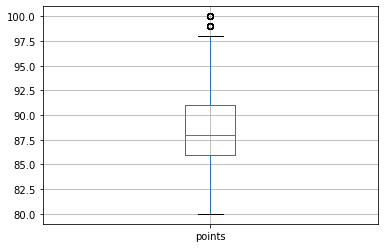

In [22]:
# Create a boxplot out from the points variable (column)
boxplot = wines.boxplot(column=['points'])
boxplot

As you can see, the plot contains five horizontal lines (including the two lines that give shape to the box). The central green line represents the *median* of the data. Remember that the median corresponds to the $2^nd$ quartile (Q2) or the $50^{th}$ percentile. That is, the median splits the data into two halves. The upper and lower blue lines represent the $3^{rd}$ and $1^{st}$ quartile, respectively–or the $75^{th}$ and $25^{th}$ percentiles. 50% of your data is contained between these two lines. You can notice that the distance between these two lines (the length of the box) is equal to the IQR. The larger the box (the larger the IQR), the more variable your data is. Finally, the upper and lower black lines of the plot are known as the *upper whisker* and *lower whisker*. The upper whisker is computed as $Q3 + 1.5 \times IQR$ and the lower whisker as $Q1 - 1.5 \times IQR$. They cannot go beyond $1.5 \times IQR$. Any other observation outside this interval is plotted as a point in the boxplot. Typically, these extreme values are what we call outliers and deserve special attention and further investigation.

```{admonition} Boxplot
:class: alert
A boxplot is a type of plot that summarizes the spread of the data based on percentiles.
```

### Histograms

**Histograms** are plots used to show the frequency of a given value or interval of values on a given variable. That is, you can identify how many values fall within a given interval. These intervals are known as **bins** and they have the same width. We can usually modify the number of bins depending on the type of analysis that we want to perform. 

Now, we will display the histogram of the `points` variable using the `hist()` method from the `pandas` library.

array([[<AxesSubplot:title={'center':'points'}>]], dtype=object)

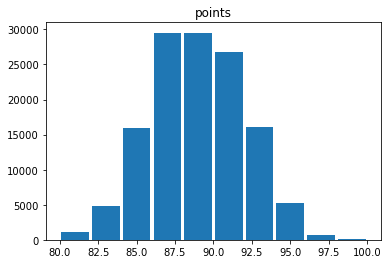

In [23]:
# Create a histogram out from the points variable (column)
hist = wines.hist(column='points', rwidth=0.9, grid=False)
hist

You can see that the data within the `points` variable has a *bell shape*. When this happens we state that our data has a **normal distribution**. However, if we create the histogram for the `price` variable the bell shape will be gone. Let us have a look.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

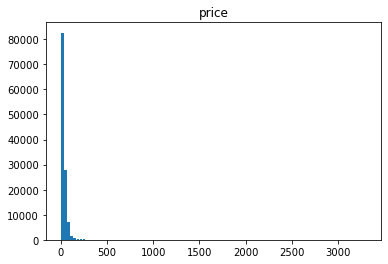

In [24]:
# Create a histogram out from the price variable (column)
hist = wines.hist(column='price', rwidth=0.9, grid=False, bins=100)
hist

This happens when your data is highly **skewed**–that is, most observations are concentrated on certain values at the beginning or the end of the variable domain. The tails of this type of distributions usually contain outliers.

```{admonition} Histogram
:class: alert
A histogram is a plot used to show the frequency of a given value or interval of values on a given variable.
```